# Demonstration of the AQUA core components on Lumi

AQUA is a model evaluation framework designed for running diagnostics on any time and spatial resolution climate models. The efficiency of data analyses with AQUA is limited only by available computing resources. With its modular design, AQUA offers seamless integration of core functions, which we will illustrate in the notebook below.


The Reader class in AQUA supports reading data from formats like NetCDF, GRIB, and Zarr and accessing FDB, utilizing a pre-defined catalog. The primary challenge in accessing new datasets is creating a new catalog entry, a task not covered in this notebook.


If you installed AQUA correctly in your machine, you could import the Reader class from the AQUA package as:

In [13]:
from aqua import Reader

You can access the data with Reader by specifying the model, experiment, and source names. For example, we choose the low-resolution healpix 2d hourly data from the IFS-NEMO model and from the historical 1990 experiment:

In [14]:
reader = Reader(model="IFS-NEMO", exp="historical-1990", source="hourly-hpz7-atm2d")
reader

The Reader returns an object of the class. To return the actual dataset, we need to retrieve the following data:

In [15]:
data = reader.retrieve()
data

<xarray.Dataset>
Dimensions:   (ncells: 196608, time: 100056)
Coordinates:
    lon       (ncells) float64 45.0 45.35 44.65 45.0 ... 315.0 315.4 314.6 315.0
    lat       (ncells) float64 0.2984 0.5968 0.5968 ... -0.5968 -0.5968 -0.2984
  * time      (time) datetime64[ns] 1990-01-01 ... 2001-05-31T23:00:00
Dimensions without coordinates: ncells
Data variables: (12/33)
    tclw      (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    tciw      (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    sp        (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    tcwv      (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    sd        (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    chnk      (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    ...        ...
    mtnlwrf   (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    metss     (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    mntss     (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    mer       (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    mtdwswrf  (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
    mtpr      (time, ncells) float64 dask.array<chunksize=(24, 196608), meta=np.ndarray>
Attributes:
    history:  2024-02-15 18:21:27 Dataset retrieved by GSV interface;\n2024-0...

The output is provided as an xarray.Dataset, which preserves the original coordinates and includes all variables. Additionally, this dataset comes with attributes detailing its history, as generated by AQUA.

In this case, the provided xarray.Dataset contains about ten years of data and 34 climatological variables. The total size of the original dataset is about 453 TB, but it takes less than a minute to get the retrieved data. The time to get the data is so small because the function reads and returns the metadata of the specified source, not the data itself.
The data will be retrieved in memory only when needed during the computations using Dask.

If we choose a specific variable in the dataset, we can calculate the spatial averages using AQUA. If we select a 2-meter temperature and the first 100 time steps, the field mean is :

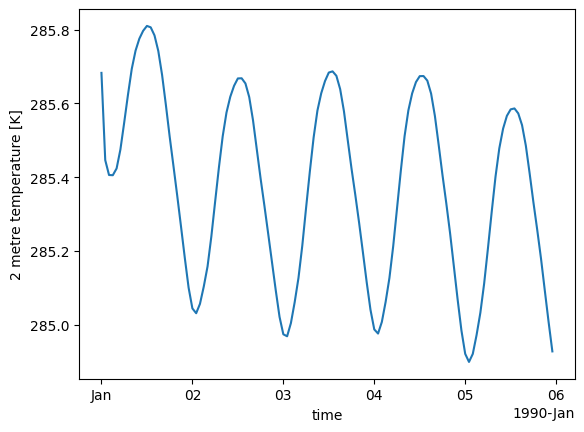

In [16]:
data['2t'].isel(time=slice(0,120)).aqua.fldmean().plot()

In addition to spatial averages, we can calculate time-averaged data. To do that, we need to determine the desired frequency (freq), such as h (hourly), D (daily), MS (monthly), or YS (yearly). 

For our dataset, we decided to calculate the daily averaged data for the first five days (i.e., 120-time steps.):

In [17]:
data_averaged = reader.timmean(data['2t'].isel(time=slice(0,120)), freq='D')
data_averaged

<xarray.DataArray '2t' (time: 5, ncells: 196608)>
dask.array<stack, shape=(5, 196608), dtype=float64, chunksize=(1, 196608), chunktype=numpy.ndarray>
Coordinates:
    lon      (ncells) float64 45.0 45.35 44.65 45.0 ... 315.0 315.4 314.6 315.0
    lat      (ncells) float64 0.2984 0.5968 0.5968 ... -0.5968 -0.5968 -0.2984
  * time     (time) datetime64[ns] 1990-01-01 1990-01-02 ... 1990-01-05
Dimensions without coordinates: ncells
Attributes: (12/20)
    long_name:                       2 metre temperature
    units:                           K
    standard_name:                   air_temperature
    GRIB_paramId:                    167
    GRIB_shortName:                  2t
    GRIB_units:                      K
    ...                              ...
    GRIB_stepUnits:                  1
    GRIB_stepType:                   instant
    GRIB_gridType:                   healpix
    GRIB_gridDefinitionDescription:  150
    gridtype:                        healpix
    history:                         \n2024-02-15 18:23:03 AQUA💧: resampled f...

Note: Here, we called `timmean()` directly as a method of the `Reader` class, but we could also call using `aqua` accessor as:

In [18]:
data_averaged = data['2t'].isel(time=slice(0,120)).aqua.timmean(freq='D')
data_averaged

<xarray.DataArray '2t' (time: 5, ncells: 196608)>
dask.array<stack, shape=(5, 196608), dtype=float64, chunksize=(1, 196608), chunktype=numpy.ndarray>
Coordinates:
    lon      (ncells) float64 45.0 45.35 44.65 45.0 ... 315.0 315.4 314.6 315.0
    lat      (ncells) float64 0.2984 0.5968 0.5968 ... -0.5968 -0.5968 -0.2984
  * time     (time) datetime64[ns] 1990-01-01 1990-01-02 ... 1990-01-05
Dimensions without coordinates: ncells
Attributes: (12/20)
    long_name:                       2 metre temperature
    units:                           K
    standard_name:                   air_temperature
    GRIB_paramId:                    167
    GRIB_shortName:                  2t
    GRIB_units:                      K
    ...                              ...
    GRIB_stepUnits:                  1
    GRIB_stepType:                   instant
    GRIB_gridType:                   healpix
    GRIB_gridDefinitionDescription:  150
    gridtype:                        healpix
    history:                         \n2024-02-15 18:23:03 AQUA💧: resampled f...

You may want to adjust the coordinates or spatial resolution of the original dataset (for example, for a proper comparison with datasets in different coordinates or resolutions). The AQUA's regridding feature can perform this for you, but you need to specify the `regrid` option during the initialization of the Reader class.

In [19]:
reader = Reader(model="IFS-NEMO", exp="historical-1990", source="hourly-hpz7-atm2d", regrid='r100')

You can select from various resolutions: 'r005' (0.05°), 'r010' (0.1°), 'r020' (0.2°), 'r025' (0.25°), 'r050' (0.5°), 'r100' (1°), 'r200' (2°), and 'r250' (2.5°), corresponding to their respective degrees in latitude and longitude.


Let's now focus on retrieving just one variable, such as '2t', from the dataset's complete variable list. Choosing specific variables streamlines the analysis, enhancing speed and memory efficiency.

In [20]:
data_2t = reader.retrieve(var='2t')

The retrieved output remains in the xarray.Dataset even if we select one specific variable, not an xarray.DataArray. 
Note: To access the variable values, use `data.var_name` or `data['var_name']`.

Note: AQUA automatically adjusts variable names and units by default, but this feature can be turned off with a `fix=False` flag when initializing the Reader.

Now let's regrid the data with AQUA:

In [21]:
data_regridded = data['2t'].isel(time=slice(0,100)).aqua.regrid()
data_regridded

<xarray.DataArray '2t' (time: 100, lat: 180, lon: 360)>
dask.array<reshape, shape=(100, 180, 360), dtype=float64, chunksize=(24, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1990-01-01 ... 1990-01-05T03:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes: (12/21)
    long_name:                       2 metre temperature
    units:                           K
    standard_name:                   air_temperature
    GRIB_paramId:                    167
    GRIB_shortName:                  2t
    GRIB_units:                      K
    ...                              ...
    GRIB_stepType:                   instant
    GRIB_gridType:                   healpix
    GRIB_gridDefinitionDescription:  150
    gridtype:                        healpix
    regridded:                       1
    history:                         \n2024-02-15 18:23:11 AQUA💧: Regrid from...

Note: Specifying the `regrid` argument when initializing the Reader object does not automatically regrid the data. Users must explicitly invoke the `regrid()` method to perform the regridding on the original data.

The AQUA package currently offers one advanced plotting function, explicitly designed for use with regridded data:

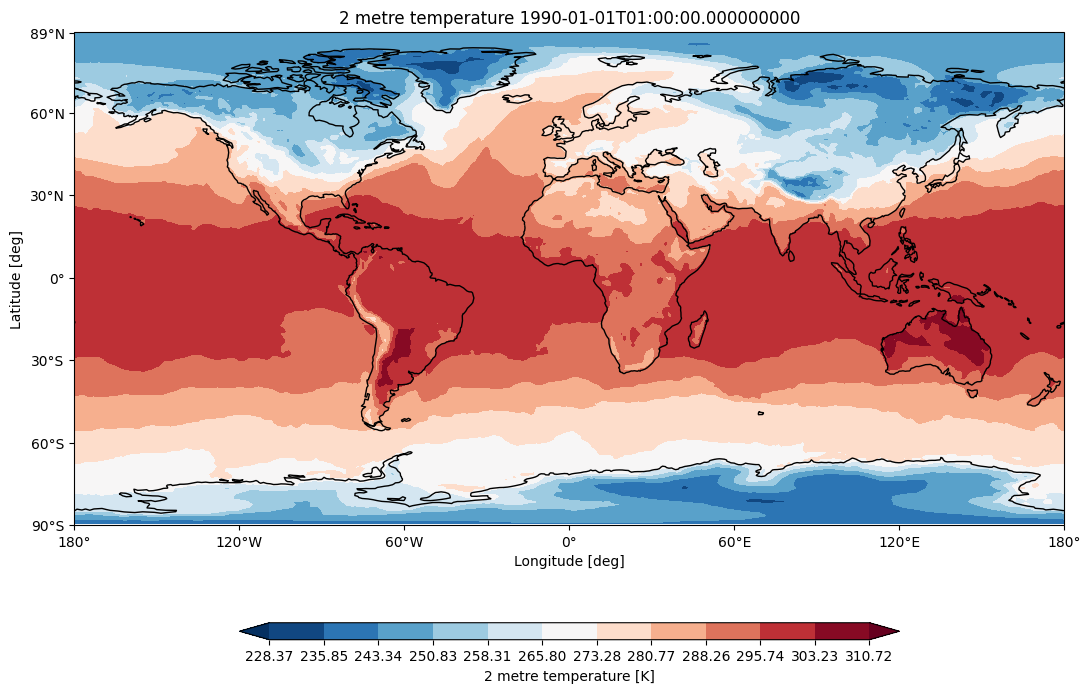

In [22]:
data_regridded.isel(time=1).aqua.plot_single_map()

Let's retrieve the 3d variable:

In [23]:
reader = Reader(model="IFS-NEMO", exp="historical-1990", source="hourly-r025-atm3d", regrid="r100")
data_3d = reader.retrieve()
data_3d

<xarray.Dataset>
Dimensions:    (lon: 1440, lat: 721, time: 100056, plev: 19)
Coordinates:
  * lon        (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat        (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1990-01-01 ... 2001-05-31T23:00:00
    idx_level  (plev) int64 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
Data variables:
    pv         (time, plev, lat, lon) float64 dask.array<chunksize=(6, 19, 721, 1440), meta=np.ndarray>
    z          (time, plev, lat, lon) float64 dask.array<chunksize=(6, 19, 721, 1440), meta=np.ndarray>
    t          (time, plev, lat, lon) float64 dask.array<chunksize=(6, 19, 721, 1440), meta=np.ndarray>
    u          (time, plev, lat, lon) float64 dask.array<chunksize=(6, 19, 721, 1440), meta=np.ndarray>
    v          (time, plev, lat, lon) float64 dask.array<chunksize=(6, 19, 721, 1440), meta=np.ndarray>
    q          (time, plev, lat, lon) float64 dask.array<chunksize=(6, 19, 721, 1440), meta=np.ndarray>
    w          (time, plev, lat, lon) float64 dask.array<chunksize=(6, 19, 721, 1440), meta=np.ndarray>
    r          (time, plev, lat, lon) float64 dask.array<chunksize=(6, 19, 721, 1440), meta=np.ndarray>
    clwc       (time, plev, lat, lon) float64 dask.array<chunksize=(6, 19, 721, 1440), meta=np.ndarray>
Attributes:
    history:  2024-02-15 18:23:35 Dataset retrieved by GSV interface;\n2024-0...

The dataset includes only 19 vertical levels. To obtain variable values at levels not present in the original dataset, you can perform interpolation to the desired levels as follows:

In [24]:
data_3d['t'].isel(time=slice(0,100)).aqua.vertinterp(levels=[900, 950], vert_coord='plev', units='hPa')

2024-02-15 18:24:47 :: Reader :: WARNING  -> Converting vert_coord units to interpolate from Pa to hPa


/LUMI_TYKKY_ZOMGa5S/miniconda/envs/env1/lib/python3.11/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


<xarray.DataArray 't' (time: 100, plev: 2, lat: 721, lon: 1440)>
dask.array<transpose, shape=(100, 2, 721, 1440), dtype=float64, chunksize=(6, 2, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lon        (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat        (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1990-01-01 ... 1990-01-05T03:00:00
    idx_level  (plev) float64 16.67 17.33
  * plev       (plev) int64 900 950
Attributes: (12/31)
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature
    GRIB_paramId:                             130
    GRIB_shortName:                           t
    GRIB_units:                               K
    ...                                       ...
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   90.0
    GRIB_latitudeOfLastGridPointInDegrees:    -90.0
    gridtype:                                 regular_ll
    history:                                  \n2024-02-15 18:24:47 AQUA💧: In...

To understand AQUA's functions deeply, check the example notebooks in [reader](https://github.com/DestinE-Climate-DT/AQUA/tree/main/notebooks/reader), [graphics](https://github.com/DestinE-Climate-DT/AQUA/tree/main/notebooks/graphics), [lra_generator](https://github.com/DestinE-Climate-DT/AQUA/tree/main/notebooks/lra_generator), and [slurm](https://github.com/DestinE-Climate-DT/AQUA/tree/main/notebooks/slurm), or consult the [documentation](https://github.com/DestinE-Climate-DT/AQUA/tree/main/docs).